### Dataset: Breast Cancer Wisconsin

Este dataset contém informações sobre tumores mamários e é usado para classificar se um tumor é **maligno** (canceroso) ou **benigno** (não canceroso).

- **Total de amostras:** 569
- **Número de features:** 30 (medidas como textura, área, suavidade, etc.)
- **Classes alvo:**
    - 0 → Maligno
    - 1 → Benigno

Cada linha representa um paciente, e as features descrevem características extraídas de imagens digitalizadas de núcleos celulares.

Nosso objetivo é treinar um modelo SVM para prever corretamente se o tumor é benigno ou maligno com base nessas características.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Carregar o dataset
cancer = datasets.load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

print("Shape do dataset:", X.shape)
print("Classes:", cancer.target_names)

Shape do dataset: (569, 30)
Classes: ['malignant' 'benign']


In [3]:
df_full = X.copy()
df_full['target'] = y
df_full.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


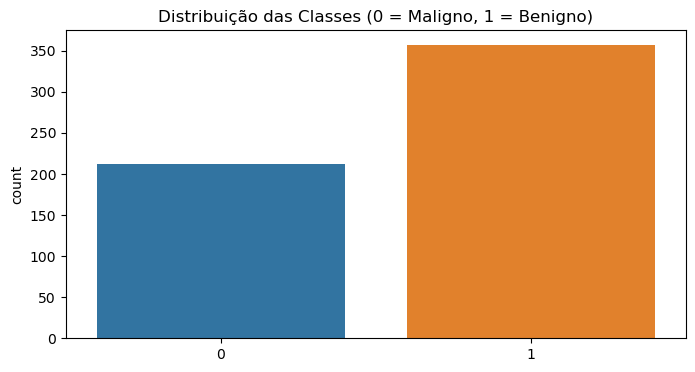

In [4]:
# Visualização exploratória
plt.figure(figsize=(8, 4))
sns.countplot(x=y)
plt.title('Distribuição das Classes (0 = Maligno, 1 = Benigno)')
plt.show()

In [5]:
# # Correlacionar features principais
# plt.figure(figsize=(12, 10))
# sns.heatmap(X.corr(), cmap='coolwarm', center=0)
# plt.title('Mapa de Correlação das Features')
# plt.show()

In [6]:
# Pré-processamento: treino/teste e normalização
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Variância explicada pelas duas primeiras componentes: 44.41% + 18.94% = 63.36%


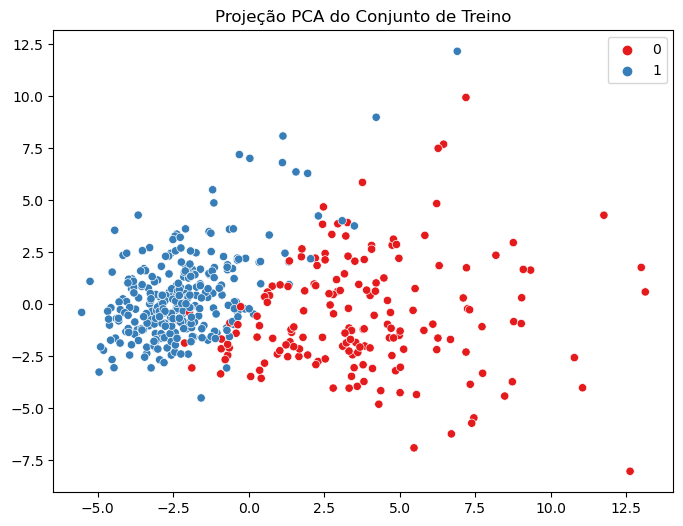

In [7]:
# Reduzir para 2D com PCA (para visualização)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

explained_var = pca.explained_variance_ratio_
print(f"Variância explicada pelas duas primeiras componentes: {explained_var[0]:.2%} + {explained_var[1]:.2%} = {(explained_var[0]+explained_var[1]):.2%}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='Set1')
plt.title('Projeção PCA do Conjunto de Treino')
plt.show()

Resultados (C=1.0):
Acurácia no teste: 0.9736842105263158


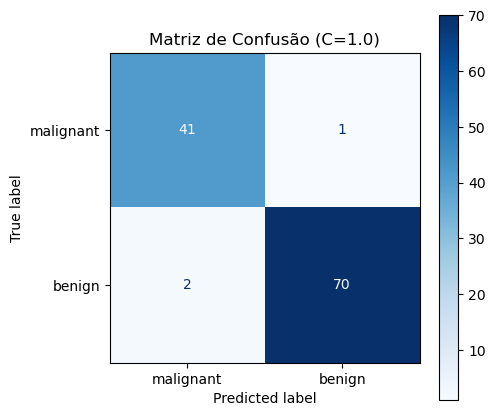


Relatório de Classificação:
              precision    recall  f1-score   support

   malignant       0.95      0.98      0.96        42
      benign       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [8]:
# Treinado um modelo SVM linear simples

svc = SVC(kernel='linear')
svc.fit(X_train_scaled, y_train)
y_pred = svc.predict(X_test_scaled)

print("Resultados (C=1.0):")
print("Acurácia no teste:", accuracy_score(y_test, y_pred))

# Plot da matriz de confusão
fig, ax = plt.subplots(figsize=(5, 5))  # ajusta o tamanho aqui!
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=cancer.target_names, cmap='Blues', ax=ax)
ax.set_title('Matriz de Confusão (C=1.0)')
plt.show()

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))

Melhor parâmetro C: 0.1
Acurácia no teste: 0.9824561403508771


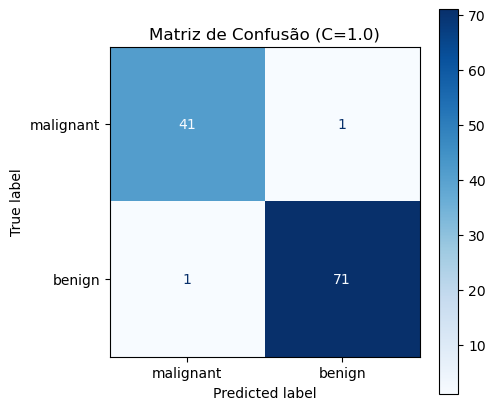


Relatório de Classificação:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [9]:
# Grid Search para SVM (linear)
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
svc = SVC(kernel='linear')
grid = GridSearchCV(svc, param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Melhor parâmetro C:", grid.best_params_['C'])

# Avaliação no conjunto de teste
y_pred = grid.predict(X_test_scaled)

print("Acurácia no teste:", accuracy_score(y_test, y_pred))

# Plot da matriz de confusão
fig, ax = plt.subplots(figsize=(5, 5))  # ajusta o tamanho aqui!
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=cancer.target_names, cmap='Blues', ax=ax)
ax.set_title('Matriz de Confusão (C=1.0)')
plt.show()

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))

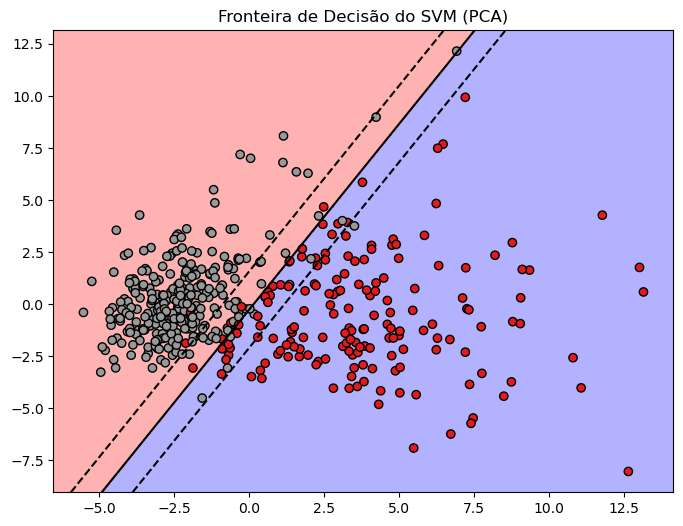

In [10]:
# Visualização final das fronteiras (apenas para visualização, usando PCA)
svc_best = SVC(kernel='linear', C=grid.best_params_['C'])
svc_best.fit(X_train_pca, y_train)

xx, yy = np.meshgrid(np.linspace(X_train_pca[:, 0].min()-1, X_train_pca[:, 0].max()+1, 500),
                     np.linspace(X_train_pca[:, 1].min()-1, X_train_pca[:, 1].max()+1, 500))

Z = svc_best.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z > 0, alpha=0.3, levels=[-1, 0, 1], colors=['blue', 'red'])
plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='Set1', edgecolor='k')
plt.title('Fronteira de Decisão do SVM (PCA)')
plt.show()

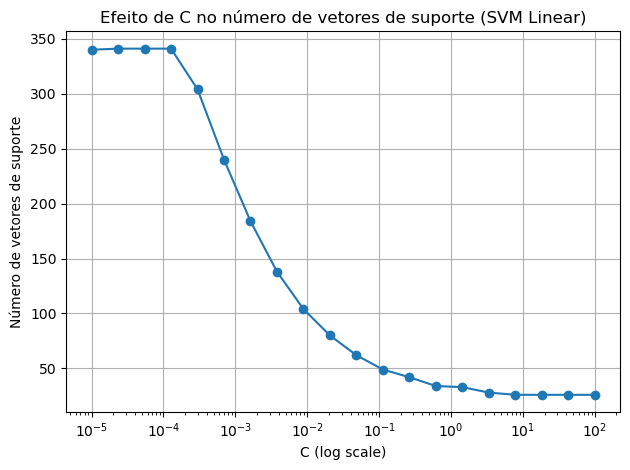

In [17]:
# Lista de valores de C
C_values = np.logspace(-5, 2, 20)
n_support = []

# Treinar SVM linear para cada C e contar os vetores de suporte
for C in C_values:
    clf = SVC(kernel='linear', C=C)
    clf.fit(X_train_scaled, y_train)
    n_support.append(len(clf.support_))

# Plotar
plt.plot(C_values, n_support, marker='o')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Número de vetores de suporte')
plt.title('Efeito de C no número de vetores de suporte (SVM Linear)')
plt.grid(True)
plt.tight_layout()
plt.show()